In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
import joblib
import gradio as gr

import warnings 
warnings.filterwarnings('ignore')

In [53]:
df = pd.read_csv('train.csv')
print(df.head())

   ID  A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0   1         1         0         1         1         1         1         0   
1   2         0         0         0         0         0         0         0   
2   3         1         1         1         1         1         1         0   
3   4         0         0         0         1         0         0         0   
4   5         0         0         0         0         1         0         0   

   A8_Score  A9_Score  ...  gender       ethnicity jaundice austim  \
0         1         1  ...       f  White-European       no     no   
1         0         0  ...       f     South Asian       no     no   
2         0         1  ...       f  White-European       no     no   
3         0         0  ...       f     South Asian       no     no   
4         0         1  ...       m           Black       no    yes   

    contry_of_res used_app_before     result     age_desc  relation Class/ASD  
0   United States       

In [54]:
df.shape

(800, 22)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [56]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,800.0,400.500000,231.084400,1.000000,200.750000,400.500000,600.250000,800.000000
A1_Score,800.0,0.582500,0.493455,0.000000,0.000000,1.000000,1.000000,1.000000
A2_Score,800.0,0.286250,0.452290,0.000000,0.000000,0.000000,1.000000,1.000000
A3_Score,800.0,0.321250,0.467249,0.000000,0.000000,0.000000,1.000000,1.000000
A4_Score,800.0,0.415000,0.493030,0.000000,0.000000,0.000000,1.000000,1.000000
A5_Score,800.0,0.457500,0.498502,0.000000,0.000000,0.000000,1.000000,1.000000
A6_Score,800.0,0.208750,0.406670,0.000000,0.000000,0.000000,0.000000,1.000000
A7_Score,800.0,0.273750,0.446161,0.000000,0.000000,0.000000,1.000000,1.000000
A8_Score,800.0,0.717500,0.450497,0.000000,0.000000,1.000000,1.000000,1.000000
A9_Score,800.0,0.316250,0.465303,0.000000,0.000000,0.000000,1.000000,1.000000


In [57]:
df['ethnicity'].value_counts()

ethnicity
White-European     211
?                  151
Asian              134
Middle Eastern     116
Black               45
Latino              44
South Asian         35
Others              24
Pasifika            18
Hispanic            16
Turkish              4
others               2
Name: count, dtype: int64

In [58]:
df['relation'].value_counts()

relation
Self                        617
?                            77
Parent                       49
Relative                     43
Health care professional      7
Others                        7
Name: count, dtype: int64

In [59]:
df = df.replace({'yes':1,'no':0,'?':'Others','others':'Others'})

In [60]:
df['relation'].value_counts()

relation
Self                        617
Others                       84
Parent                       49
Relative                     43
Health care professional      7
Name: count, dtype: int64

In [61]:
df['gender'].value_counts()

gender
f    415
m    385
Name: count, dtype: int64

In [62]:
df['age_desc'].value_counts()

age_desc
18 and more    800
Name: count, dtype: int64

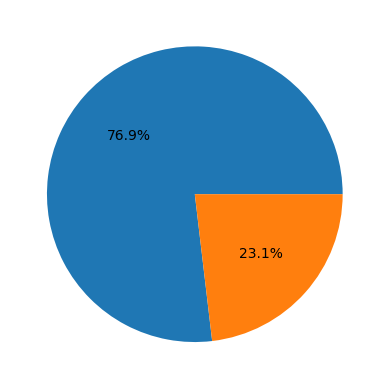

In [63]:
plt.pie(df['Class/ASD'].value_counts().values,autopct='%1.1f%%')
plt.show()

In [64]:
ints = []
objects = []
floats = []

for col in df.columns:
    if df[col].dtype == 'int64':
        ints.append(col)
    elif df[col].dtype == 'float64':
        floats.append(col)
    else :
        objects.append(col)

In [65]:
ints.remove('ID')
ints.remove('Class/ASD')

In [66]:
ints

['A1_Score',
 'A2_Score',
 'A3_Score',
 'A4_Score',
 'A5_Score',
 'A6_Score',
 'A7_Score',
 'A8_Score',
 'A9_Score',
 'A10_Score',
 'jaundice',
 'austim',
 'used_app_before']

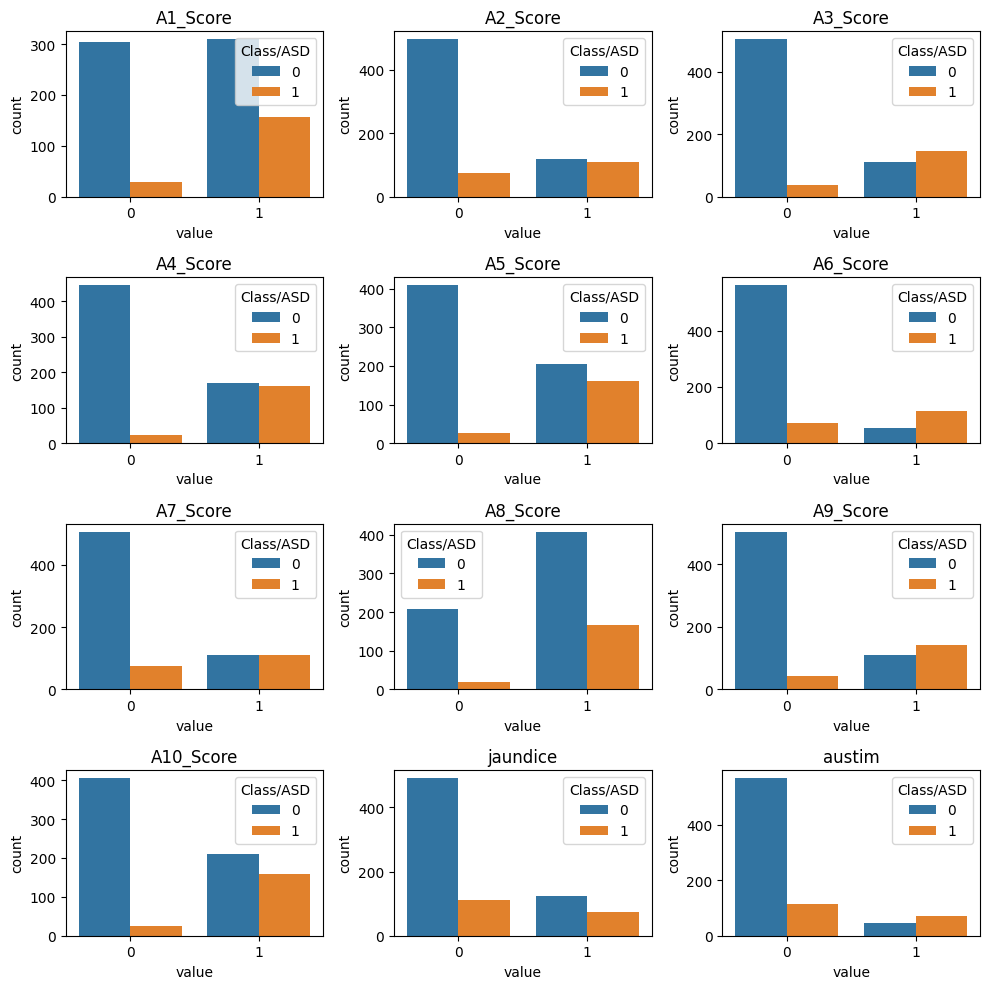

In [67]:
ints = ints[:12]
df_long = pd.melt(df, id_vars='Class/ASD', value_vars=ints)
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(10, 10))
axes = axes.flatten()
for i, col in enumerate(ints):
    sb.countplot(x='value', hue='Class/ASD', data=df_long[df_long['variable'] == col], ax=axes[i])
    axes[i].set_title(col)
plt.tight_layout()
plt.show()

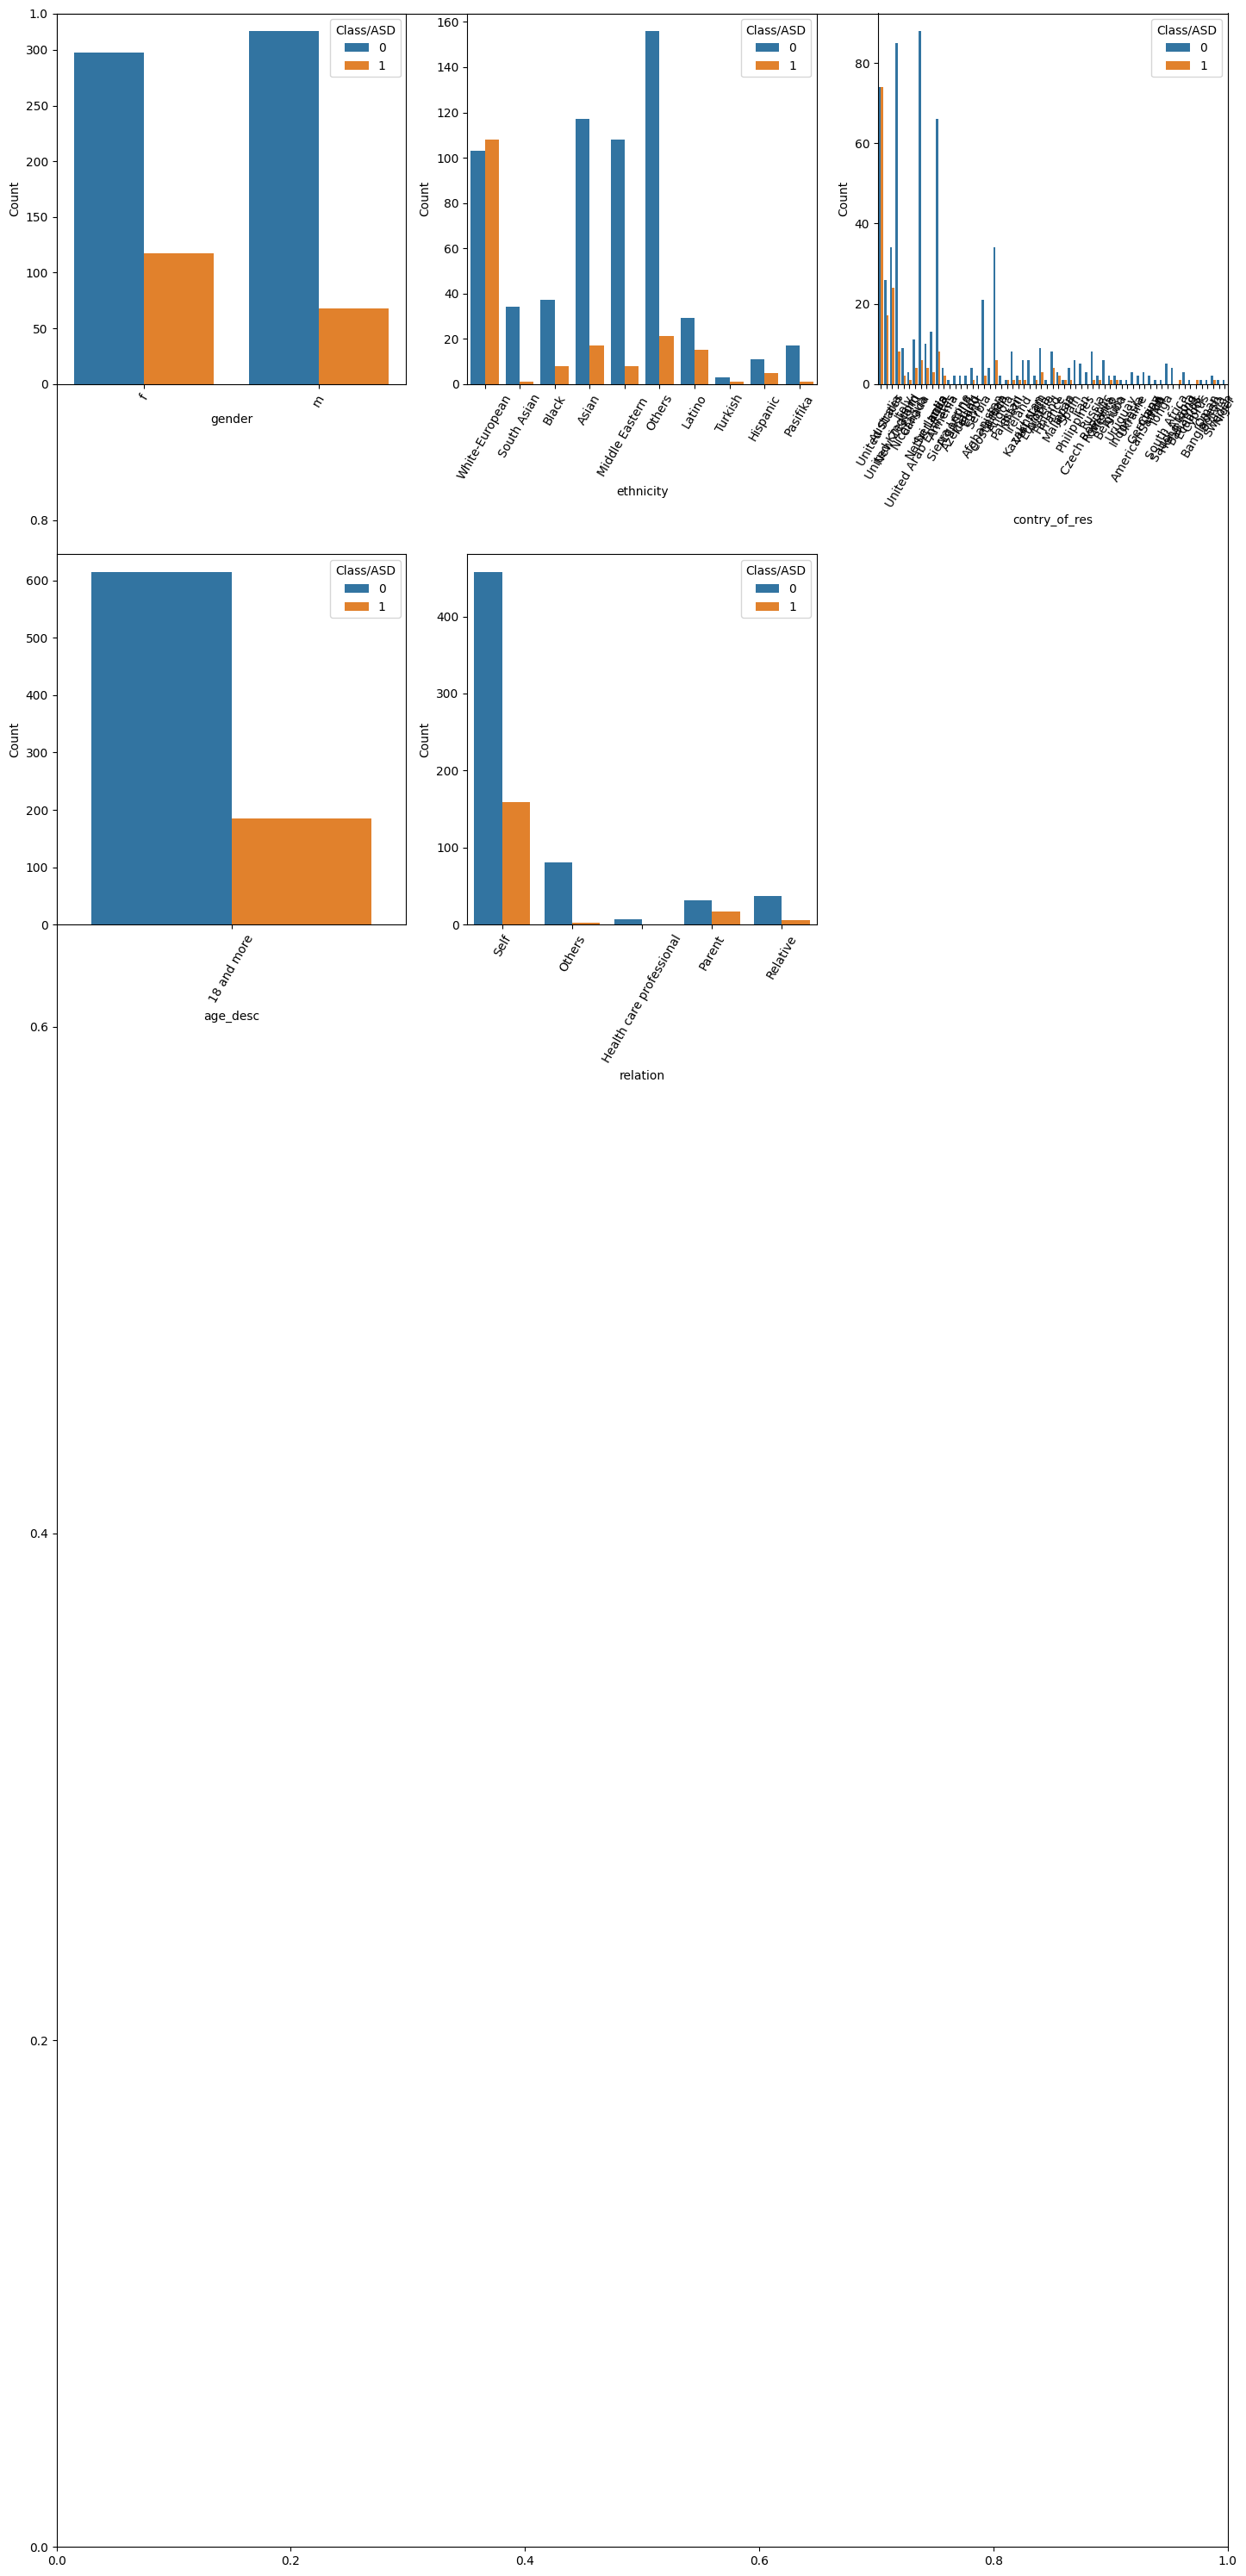

In [68]:
plt.subplots(figsize=(15, 30))

for i, col in enumerate(objects):
    plt.subplot(5, 3, i + 1)
    sb.countplot(x=col, hue='Class/ASD', data=df)
    plt.xticks(rotation=60)
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

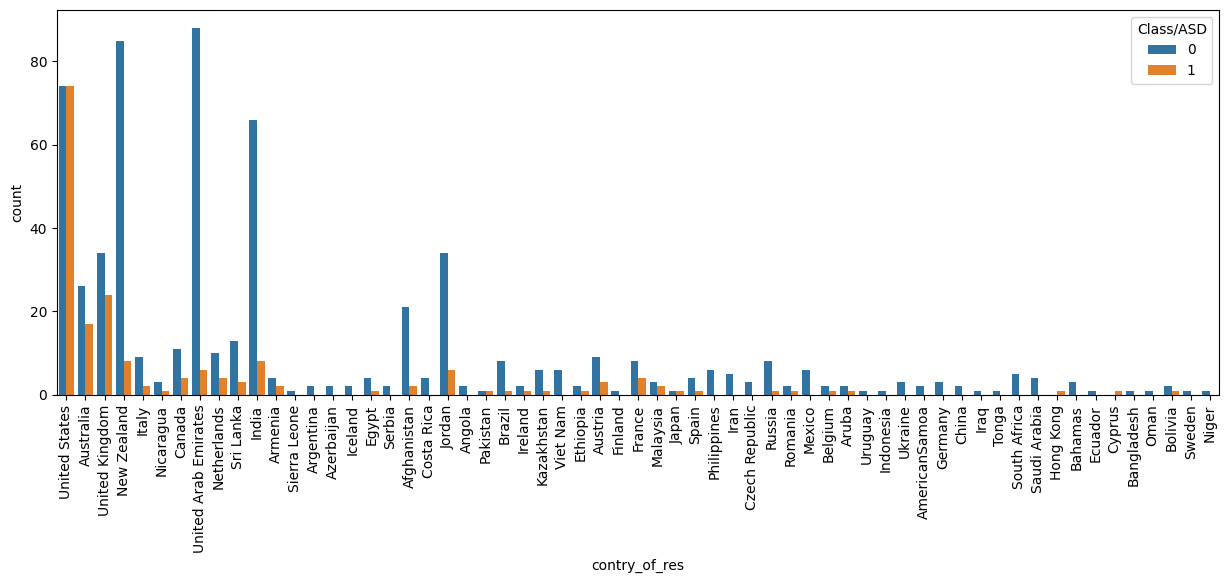

In [69]:
plt.figure(figsize=(15,5))
sb.countplot(x='contry_of_res',hue='Class/ASD',data=df)
plt.xticks(rotation=90)
plt.show()

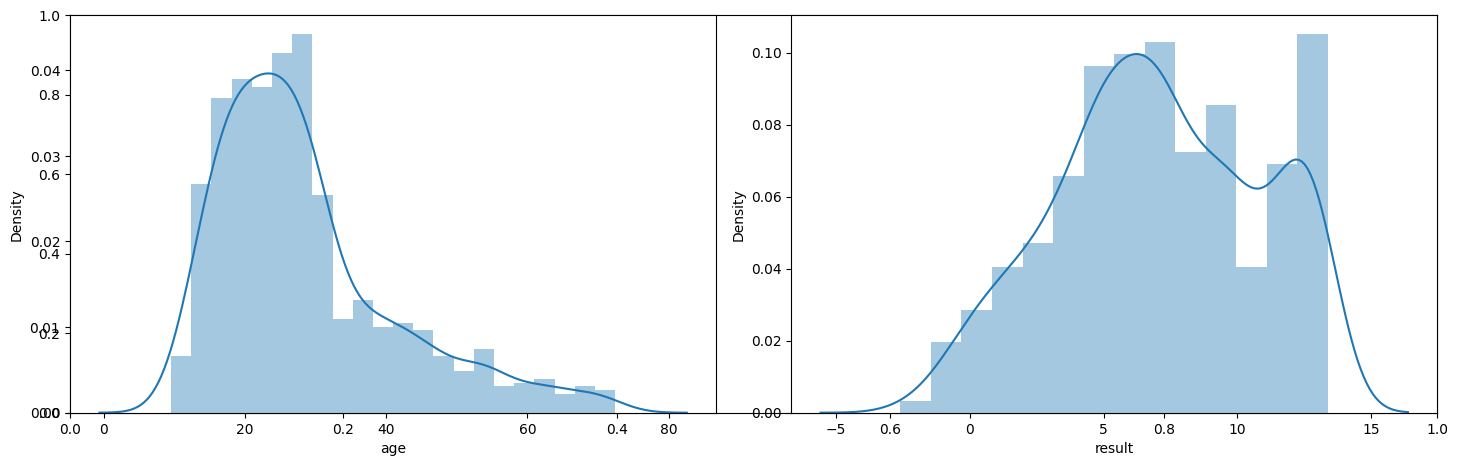

In [70]:
plt.subplots(figsize=(15,5))

for i, col in enumerate(floats):
    plt.subplot(1,2,i+1)
    sb.distplot(df[col])

plt.tight_layout()
plt.show()


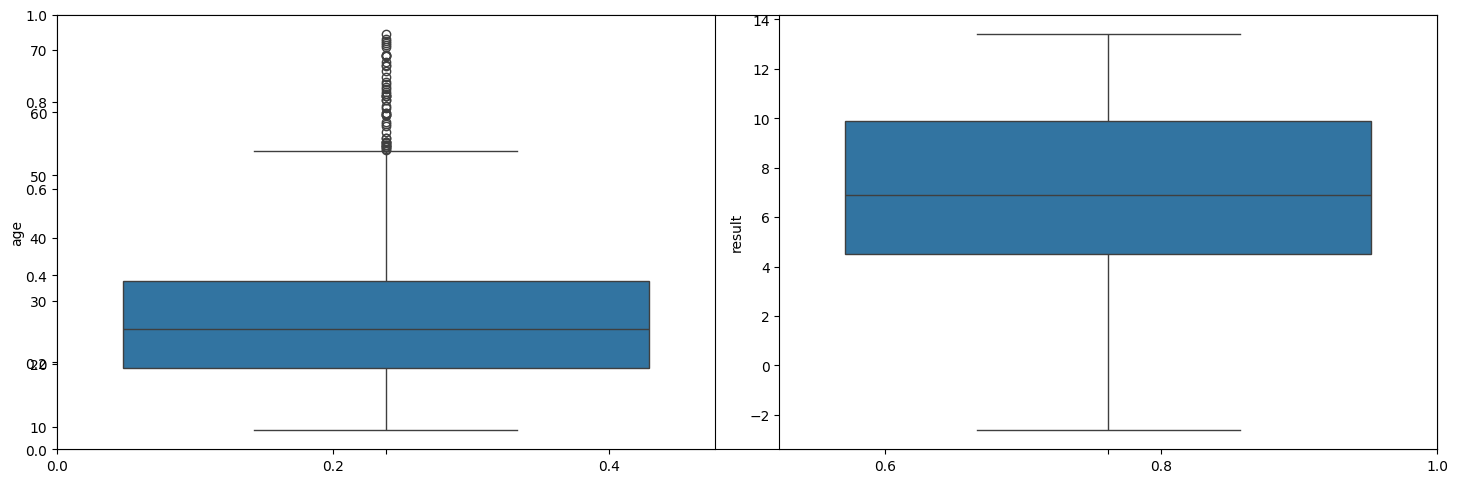

In [71]:

plt.subplots(figsize=(15,5))
 
for i, col in enumerate(floats):
  plt.subplot(1,2,i+1)
  sb.boxplot(df[col])
plt.tight_layout()
plt.show()

In [72]:
def convertAge(age):
    if age < 12:
        return 'Kid'
    elif age < 18:
        return 'Teenager'
    elif age < 40:
        return 'Young'
    else:
        return 'Senior'
 
df['ageGroup'] = df['age'].apply(convertAge)

In [73]:
df['ageGroup'].value_counts()

ageGroup
Young       513
Teenager    144
Senior      134
Kid           9
Name: count, dtype: int64

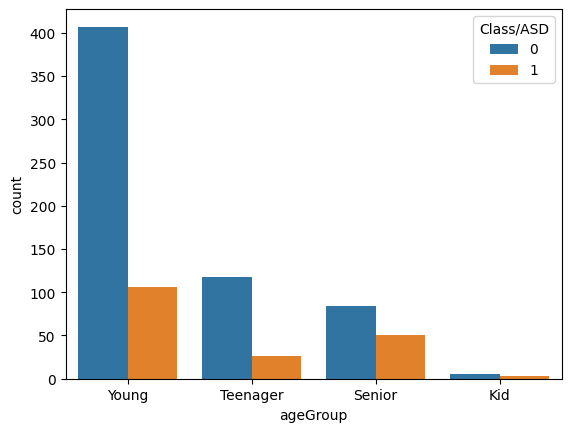

In [74]:

sb.countplot(x=df['ageGroup'], hue=df['Class/ASD'])
plt.show()

In [75]:
def add_feature(data):

    # Creating a column with all values zero
    data['sum_score'] = 0
    for col in data.loc[:,'A1_Score':'A10_Score'].columns:
        
        # Updating the 'sum_score' value with scores
        # from A1 to A10
        data['sum_score'] += data[col]

    return data

df = add_feature(df)


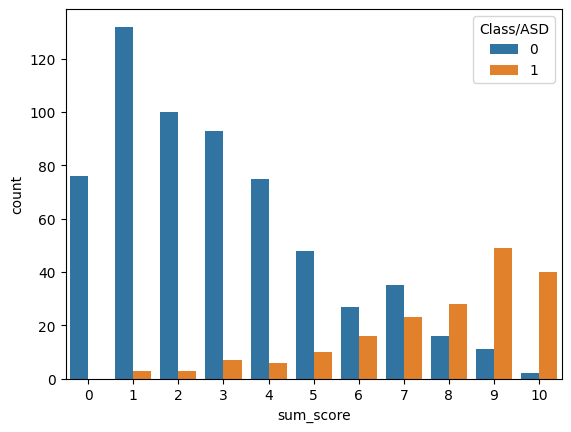

In [76]:
sb.countplot(x=df['sum_score'], hue=df['Class/ASD'])
plt.show()

In [77]:
# Applying log transformations to remove the skewness of the data.
df['age'] = df['age'].apply(lambda x: np.log(x))

In [78]:
df['age'].value_counts()

age
2.923452    1
3.241021    1
3.167976    1
3.488582    1
3.375778    1
           ..
4.171069    1
2.965881    1
3.377313    1
3.226781    1
3.471037    1
Name: count, Length: 800, dtype: int64

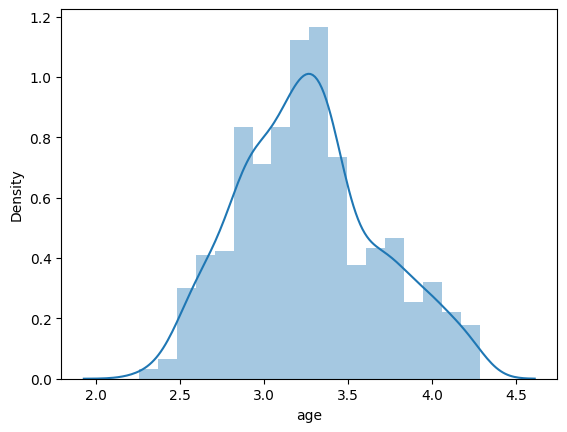

In [79]:
sb.distplot(df['age'])
plt.show()


Text(0.5, 1.0, 'Autism presence in the family')

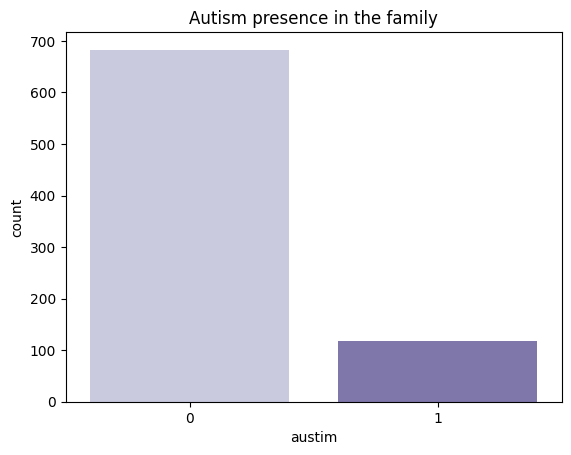

In [80]:
sb.countplot(x="austim",data=df,palette="Purples")
plt.title('Autism presence in the family')

Text(0.5, 1.0, 'Autism by screening test')

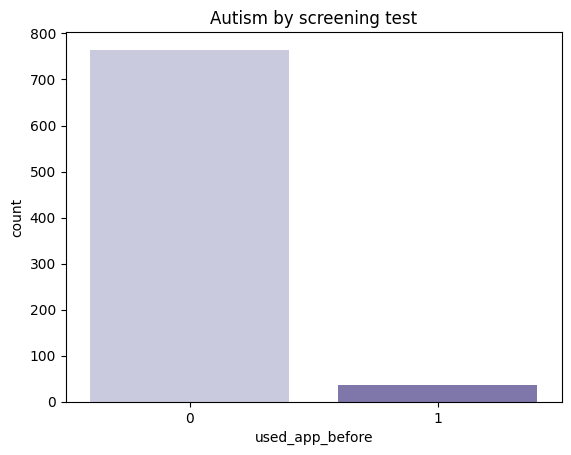

In [81]:
sb.countplot(x="used_app_before",data=df,palette="Purples")
plt.title('Autism by screening test')

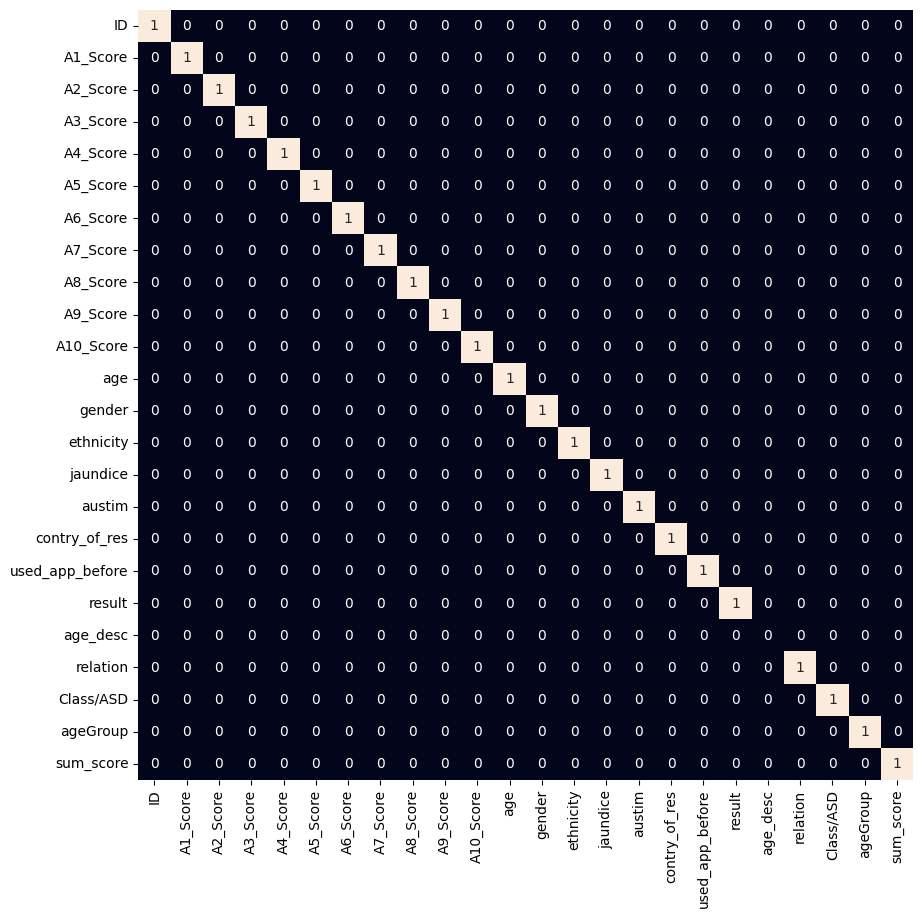

In [82]:
# Function to encode labels
def encode_labels(data):
    for col in data.columns:
        # Check if datatype is object, then encode it
        if data[col].dtype == 'object':
            le = LabelEncoder()
            data[col] = le.fit_transform(data[col])
    return data

# Assuming df is your DataFrame
df = encode_labels(df)

# Making a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 10))
sb.heatmap(df.corr() > 0.8, annot=True, cbar=False)
plt.show()

In [83]:
df.corr()['Class/ASD'].sort_values(ascending=False)[1:]

sum_score          0.661272
A3_Score           0.549618
A6_Score           0.542588
A9_Score           0.538688
A4_Score           0.512792
result             0.496165
A5_Score           0.448473
A10_Score          0.439587
A7_Score           0.394660
A2_Score           0.380703
austim             0.377079
A1_Score           0.289991
ethnicity          0.284711
A8_Score           0.219034
jaundice           0.190769
relation           0.136268
age                0.131178
contry_of_res      0.110710
ID                 0.061677
used_app_before   -0.015853
ageGroup          -0.123106
gender            -0.124789
age_desc                NaN
Name: Class/ASD, dtype: float64

In [84]:
removal = ['ID', 'age_desc', 'used_app_before','ageGroup','result']
features = df.drop(removal + ['Class/ASD'], axis=1)
target = df['Class/ASD']


In [85]:
features

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,relation,sum_score
0,1,0,1,1,1,1,0,1,1,1,2.923452,0,9,0,0,58,4,8
1,0,0,0,0,0,0,0,0,0,1,2.626795,0,7,0,0,6,1,1
2,1,1,1,1,1,1,0,0,1,1,2.686479,0,9,0,0,57,4,8
3,0,0,0,1,0,0,0,0,0,0,4.111452,0,7,0,0,39,1,1
4,0,0,0,0,1,0,0,0,1,1,2.657226,1,1,0,1,32,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,1,1,1,1,1,1,1,1,1,1,3.739689,0,9,0,1,58,4,10
796,1,1,0,0,1,0,0,0,1,1,2.871828,0,0,0,0,39,4,5
797,0,0,0,0,0,0,1,0,1,1,2.903757,1,9,1,0,34,4,3
798,1,1,1,1,1,1,0,1,1,1,2.957068,0,4,0,1,58,3,9


In [86]:
X_train, X_val, Y_train, Y_val = train_test_split(features, target, test_size = 0.2, random_state=1)

# As the data was highly imbalanced we will balance it by adding repetitive rows of minority class.
ros = RandomOverSampler(sampling_strategy='minority',random_state=0)
X, Y = ros.fit_resample(X_train,Y_train)
X.shape, Y.shape

((992, 18), (992,))

In [87]:
# Normalizing the features for stable and fast training.
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_val = scaler.transform(X_val)


In [88]:
models = [LogisticRegression(), XGBClassifier(), SVC(kernel='rbf')]

for model in models:
    model.fit(X, Y)

    print(f'{model} : ')
    print('Training Accuracy : ', metrics.roc_auc_score(Y, model.predict(X)))
    print('Validation Accuracy : ', metrics.roc_auc_score(Y_val, model.predict(X_val)))
    print()


LogisticRegression() : 
Training Accuracy :  0.8629032258064516
Validation Accuracy :  0.8226070916171346

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training Accuracy :  1.0
Validation Accuracy :  0.8074400491904079

SVC() : 
Training Accuracy :  0.9243951612903226
Validation Accu

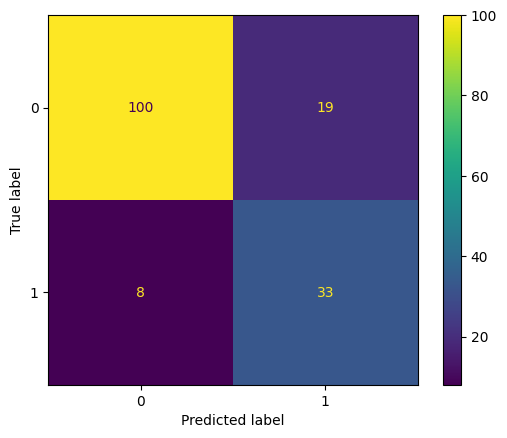

In [89]:
y_pred = models[0].predict(X_val)
cm = metrics.confusion_matrix(Y_val, y_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

In [90]:
joblib.dump(model, 'logistic_regression_model.pkl')
scaler = StandardScaler().fit(features)
joblib.dump(scaler, 'scaler.pkl')

# joblib.dump(model, 'logistic_regression_model.pkl')
# joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [91]:
# Load the trained model and the scaler
model = joblib.load('logistic_regression_model.pkl')
scaler = joblib.load('scaler.pkl')

In [92]:
features

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,relation,sum_score
0,1,0,1,1,1,1,0,1,1,1,2.923452,0,9,0,0,58,4,8
1,0,0,0,0,0,0,0,0,0,1,2.626795,0,7,0,0,6,1,1
2,1,1,1,1,1,1,0,0,1,1,2.686479,0,9,0,0,57,4,8
3,0,0,0,1,0,0,0,0,0,0,4.111452,0,7,0,0,39,1,1
4,0,0,0,0,1,0,0,0,1,1,2.657226,1,1,0,1,32,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,1,1,1,1,1,1,1,1,1,1,3.739689,0,9,0,1,58,4,10
796,1,1,0,0,1,0,0,0,1,1,2.871828,0,0,0,0,39,4,5
797,0,0,0,0,0,0,1,0,1,1,2.903757,1,9,1,0,34,4,3
798,1,1,1,1,1,1,0,1,1,1,2.957068,0,4,0,1,58,3,9


In [93]:

# Define the categorical columns
categorical_columns = ['gender', 'ethnicity', 'jaundice','austim', 'contry_of_res', 'relation']

# Define a function for preprocessing and prediction
def predict_autism(
    A1_Score, A2_Score, A3_Score, A4_Score, A5_Score, A6_Score, A7_Score, A8_Score, A9_Score, A10_Score, 
    age, gender, ethnicity, jaundice, contry_of_res, relation, austim
):
    # Create a DataFrame from the input in the correct order
    data = pd.DataFrame({
        'A1_Score': [A1_Score], 
        'A2_Score': [A2_Score], 
        'A3_Score': [A3_Score], 
        'A4_Score': [A4_Score],
        'A5_Score': [A5_Score], 
        'A6_Score': [A6_Score], 
        'A7_Score': [A7_Score], 
        'A8_Score': [A8_Score],
        'A9_Score': [A9_Score], 
        'A10_Score': [A10_Score], 
        'age': [np.log(age)], 
        'gender': [gender],
        'ethnicity': [ethnicity], 
        'jaundice': [jaundice],
        'austim': [austim], 
        'contry_of_res': [contry_of_res],
        'relation': [relation], 
    })

    # Encode categorical variables
    encoders = {}
    for col in categorical_columns:
        encoder = LabelEncoder()
        encoder.fit(data[col])
        data[col] = encoder.transform(data[col])
        encoders[col] = encoder
    
    # Calculate sum_score
    data['sum_score'] = data[['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score']].sum(axis=1)

    # Ensure the DataFrame columns are in the same order as during training
    feature_order = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 
                     'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender', 'ethnicity', 'jaundice','austim',
                     'contry_of_res', 'relation',  'sum_score']
    
    data = data[feature_order]

    # Normalize the features
    data = scaler.transform(data)

    # Predict using the model
    prediction = model.predict(data)

    # Return the prediction
    return "Autism" if prediction[0] == 1 else "No Autism"

# Create the Gradio interface
interface = gr.Interface(
    fn=predict_autism,
    inputs=[
        gr.Slider(minimum=0, maximum=1, step=1, label="A1_Score"),
        gr.Slider(minimum=0, maximum=1, step=1, label="A2_Score"),
        gr.Slider(minimum=0, maximum=1, step=1, label="A3_Score"),
        gr.Slider(minimum=0, maximum=1, step=1, label="A4_Score"),
        gr.Slider(minimum=0, maximum=1, step=1, label="A5_Score"),
        gr.Slider(minimum=0, maximum=1, step=1, label="A6_Score"),
        gr.Slider(minimum=0, maximum=1, step=1, label="A7_Score"),
        gr.Slider(minimum=0, maximum=1, step=1, label="A8_Score"),
        gr.Slider(minimum=0, maximum=1, step=1, label="A9_Score"),
        gr.Slider(minimum=0, maximum=1, step=1, label="A10_Score"),
        gr.Number(label="Age"),
        gr.Textbox(label="Gender"),
        gr.Textbox(label="Ethnicity"),
        gr.Checkbox(label="Jaundice (bou sefer)"),
        gr.Checkbox(label="An immediate family member has been diagnosed with autism"),
        gr.Textbox(label="Country of Residence"),
        gr.Textbox(label="Relation"),
    ],
    outputs="text",
    title="Autism Prediction",
    description="Enter the details to predict the likelihood of autism."
)

# Launch the interface
interface.launch()


Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.
